# Comprensión y Análisis Exploratorio de Datos (EDA)

**Objetivo**: Realizar un análisis exploratorio exhaustivo del dataset para comprender las características, distribuciones y relaciones entre variables.

Este notebook incluye:
- ✅ Exploración inicial de datos
- ✅ Análisis univariable (distribuciones individuales)
- ✅ Análisis bivariable (relaciones entre pares de variables)
- ✅ Análisis multivariable (correlaciones y relaciones múltiples)
- ✅ Identificación de patrones y outliers
- ✅ Conclusiones para la ingeniería de características

## 1. Carga de Librerías y Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


In [2]:
# Cargar configuración y datos
with open('../config.json', 'r') as f:
    config = json.load(f)

df = pd.read_csv(f"../{config['data_file']}")

print(f"✓ Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

✓ Dataset cargado: 20,640 filas × 10 columnas


## 2. Descripción General de los Datos

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.00,322,126,8.33,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.00,2401,1138,8.30,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.00,496,177,7.26,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.00,558,219,5.64,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.00,565,259,3.85,NEAR BAY,342200


In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
null_count_total_bedrooms = df['total_bedrooms'].isnull().sum()
print(f"Número de valores nulos en 'total_bedrooms': {null_count_total_bedrooms}")
print(f"Porcentaje de nulos: {null_count_total_bedrooms/len(df)*100:.2f}%")

Número de valores nulos en 'total_bedrooms': 207
Porcentaje de nulos: 1.00%


El dataset cuenta con **10 campos**:
- **9 variables numéricas**: 5 tipo int y 4 tipo float
- **1 variable categórica nominal**: ocean_proximity

**Valores nulos:**
- El campo total_bedrooms es el único que contiene valores nulos: **207 registros** (~1% del dataset)
- A estos datos faltantes se les aplicará imputación (media, mediana u otras técnicas)

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


**ocean_proximity** clasifica cada vivienda según su cercanía al océano.

**Hallazgos importantes:**
- La categoría "ISLAND" tiene solo 5 registros (casas en islas)
  - Decisión a tomar: Evaluar si mantener o eliminar estos registros por su baja representatividad
- Las categorías más frecuentes son:
  - "<1H OCEAN" e "INLAND" → Mayor cantidad de registros
- La distribución de las otras categorías es relativamente equilibrada

## 3. Análisis Univariable

Análisis de cada variable individual para entender su distribución, tendencia central y dispersión.

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


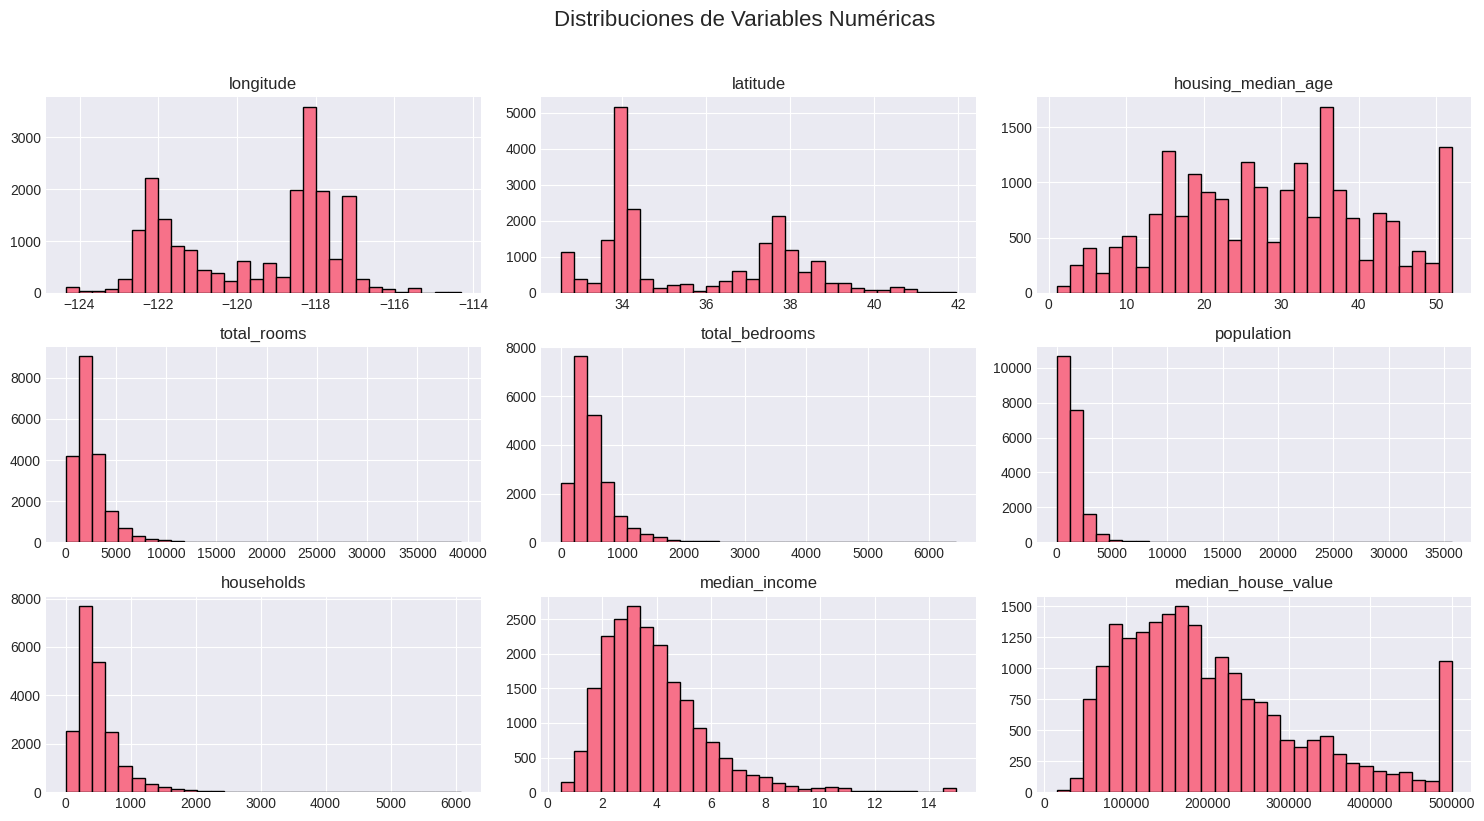

In [9]:
# Histogramas de todas las variables numéricas
df.hist(bins=30, figsize=(15,8), edgecolor='black')
plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

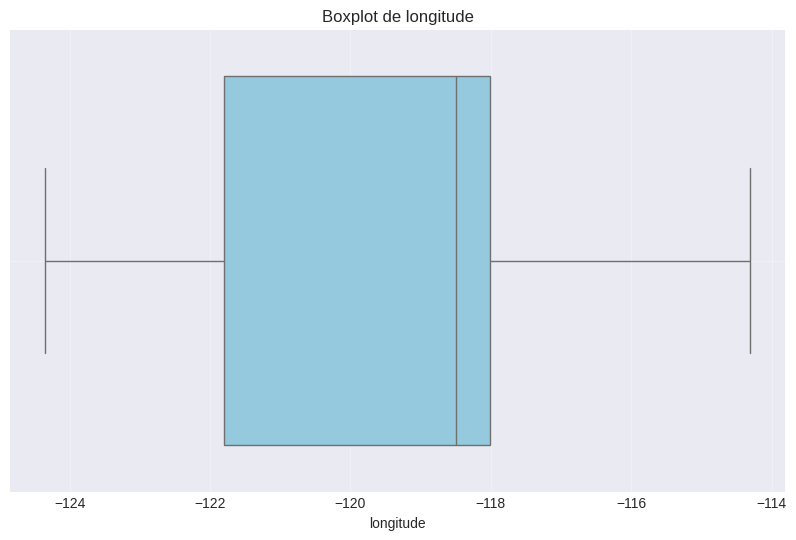

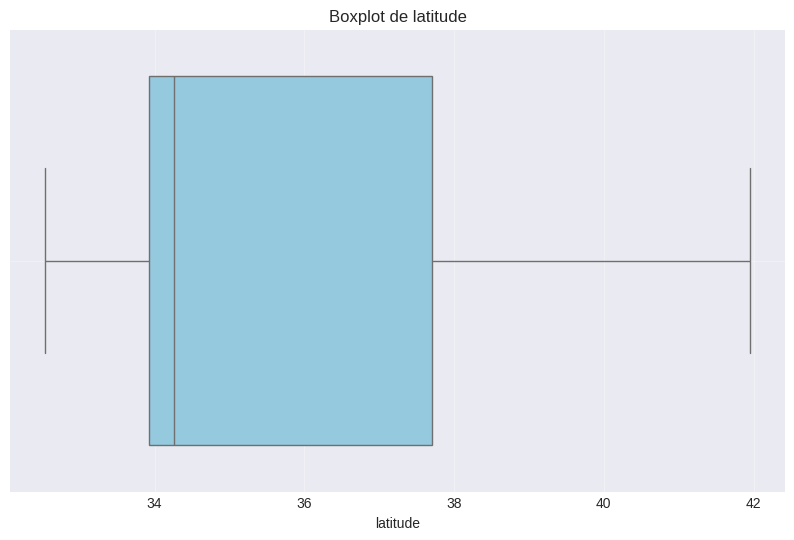

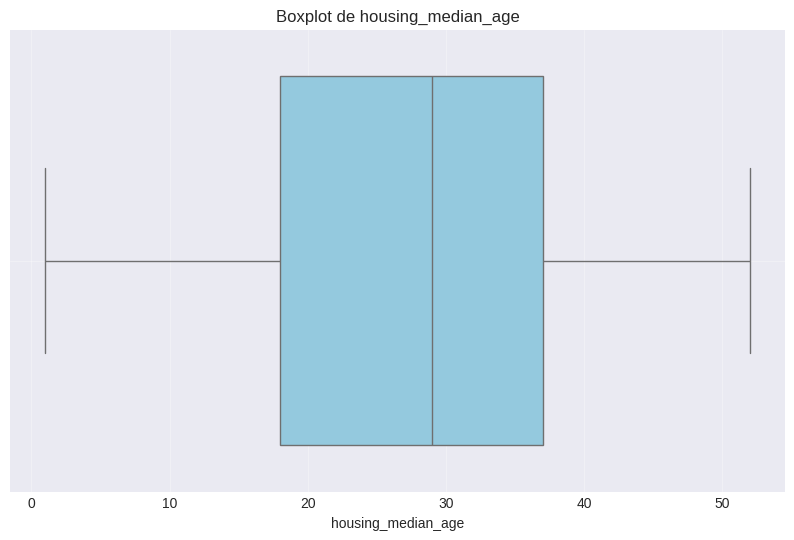

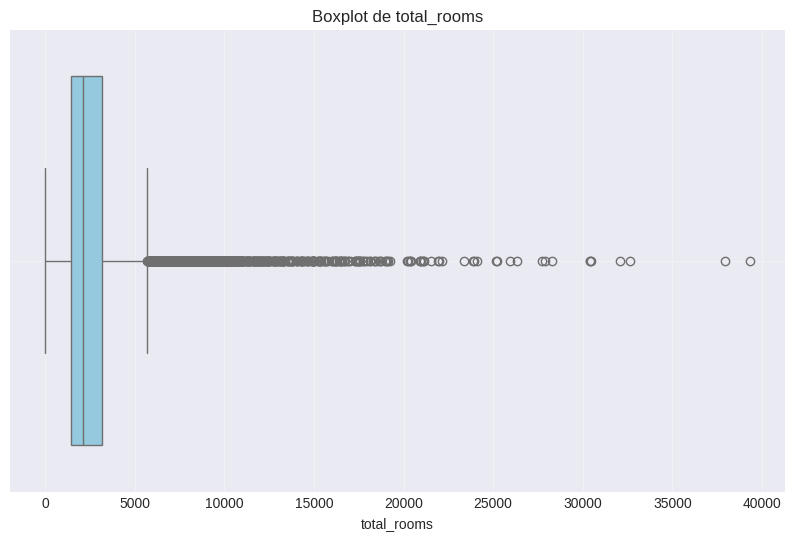

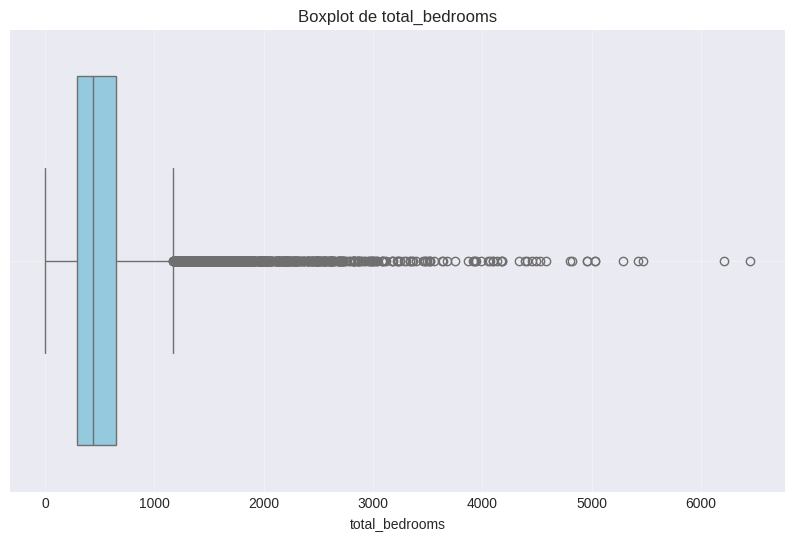

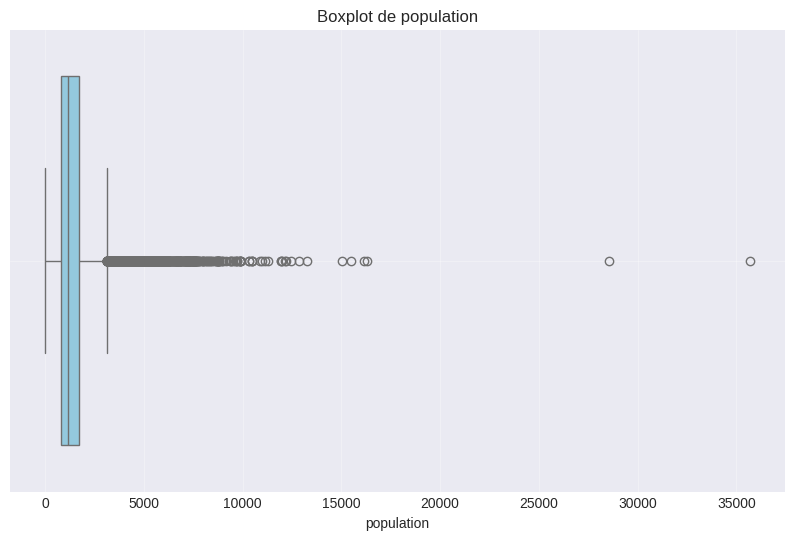

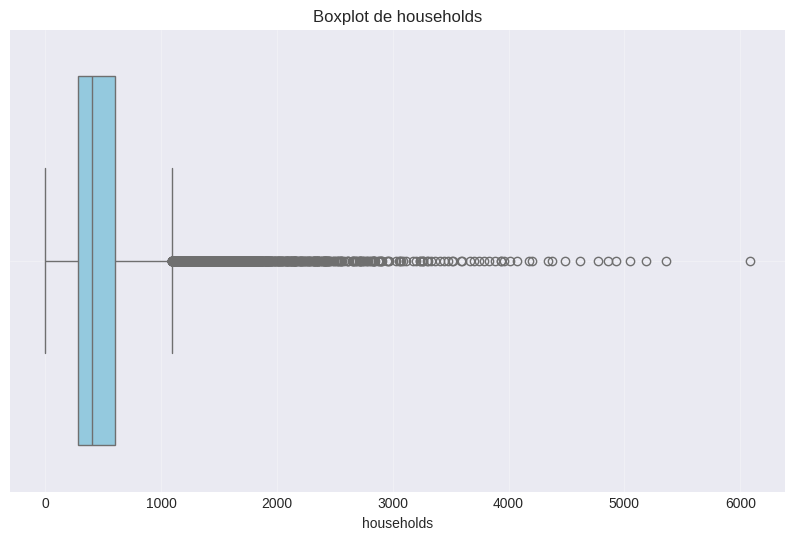

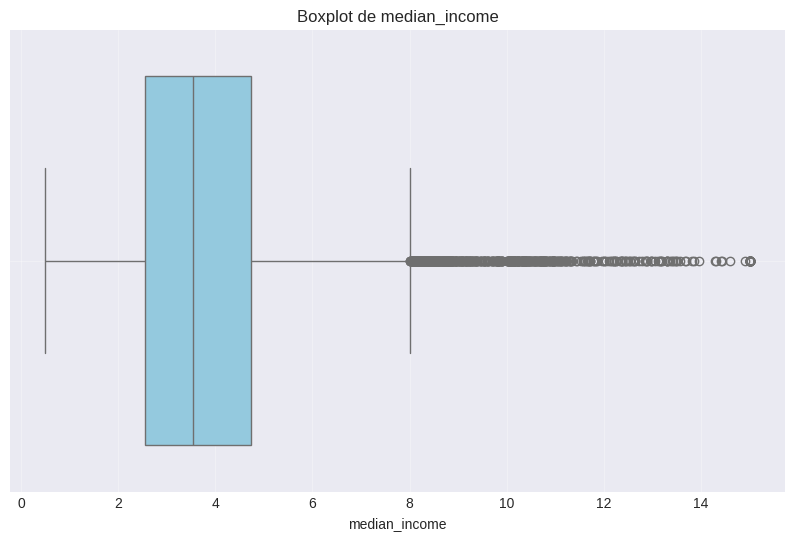

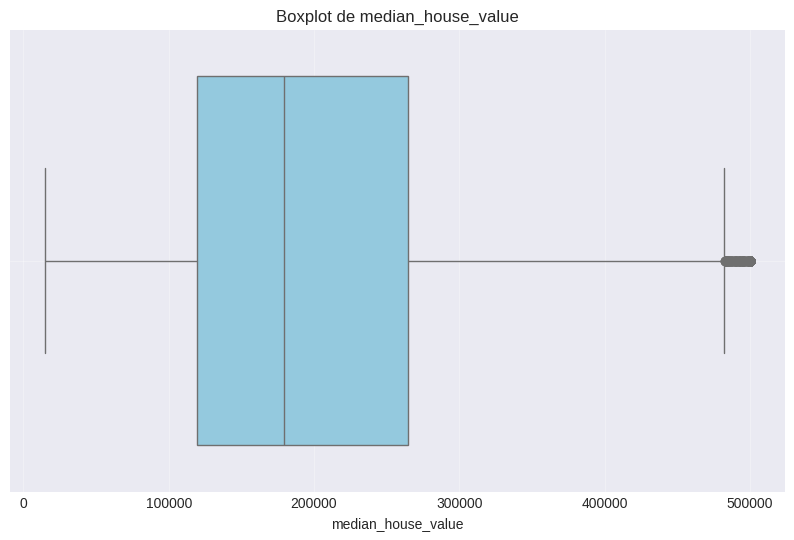

In [10]:
# Boxplots para detectar outliers
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True, alpha=0.3)
    plt.show()

## 4. Análisis Bivariable


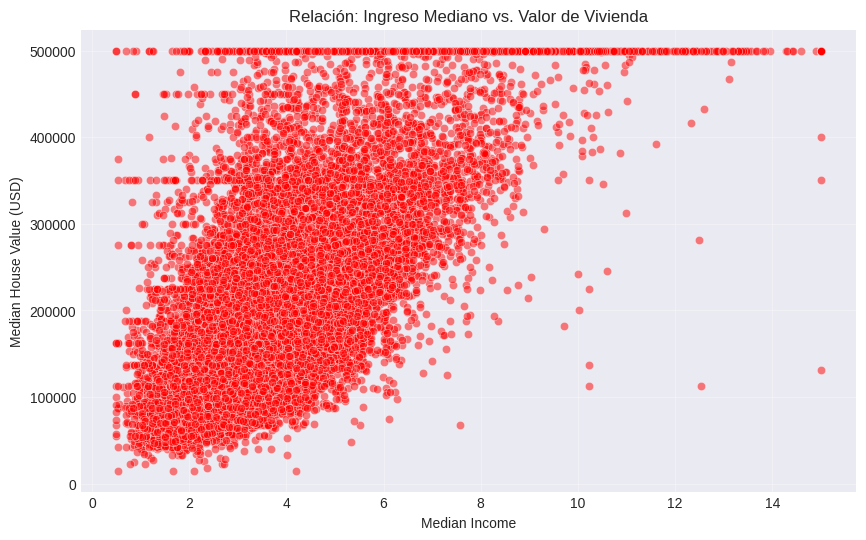

In [11]:
# Relación entre ingreso mediano y valor de la vivienda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, color='red', alpha=0.5)
plt.title('Relación: Ingreso Mediano vs. Valor de Vivienda')
plt.xlabel('Median Income')
plt.ylabel('Median House Value (USD)')
plt.grid(True, alpha=0.3)
plt.show()

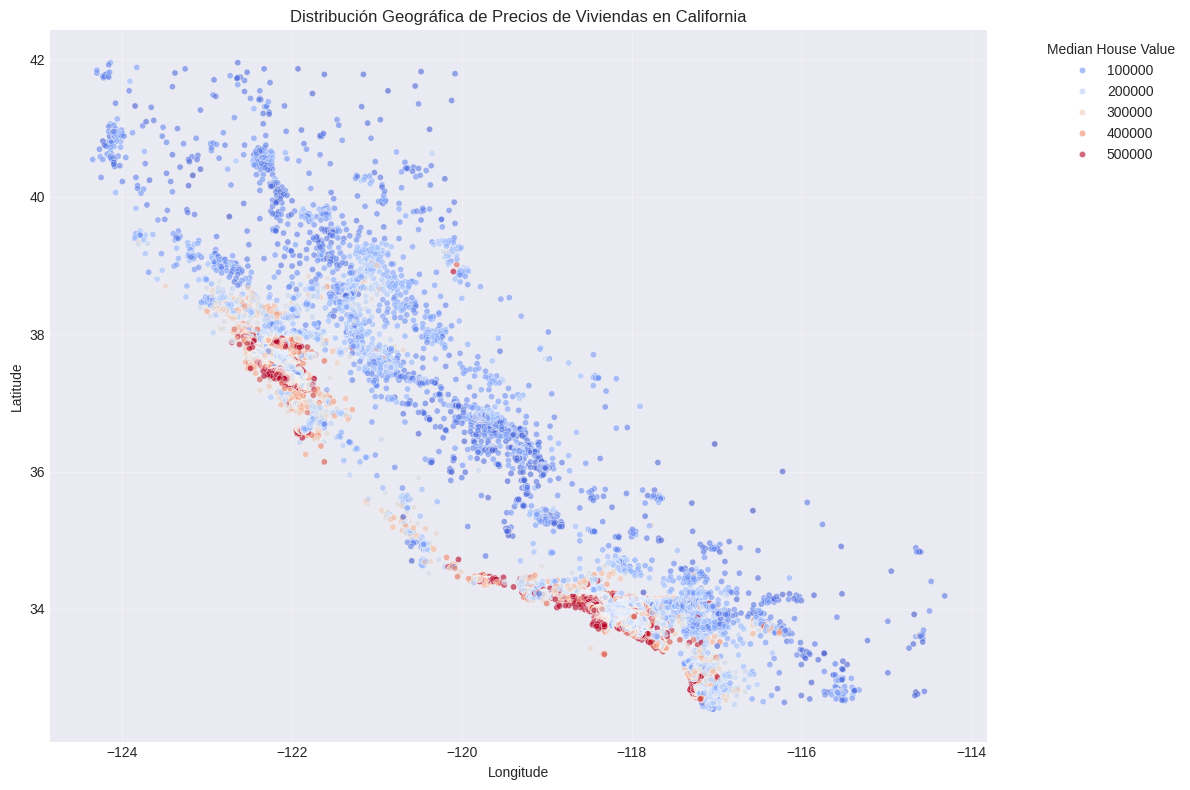

In [12]:
# Distribución geográfica de precios
plt.figure(figsize=(12, 8))
sns.scatterplot(x="longitude", y="latitude", data=df, hue="median_house_value", palette="coolwarm", alpha=0.6, s=20)
plt.title('Distribución Geográfica de Precios de Viviendas en California')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Median House Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

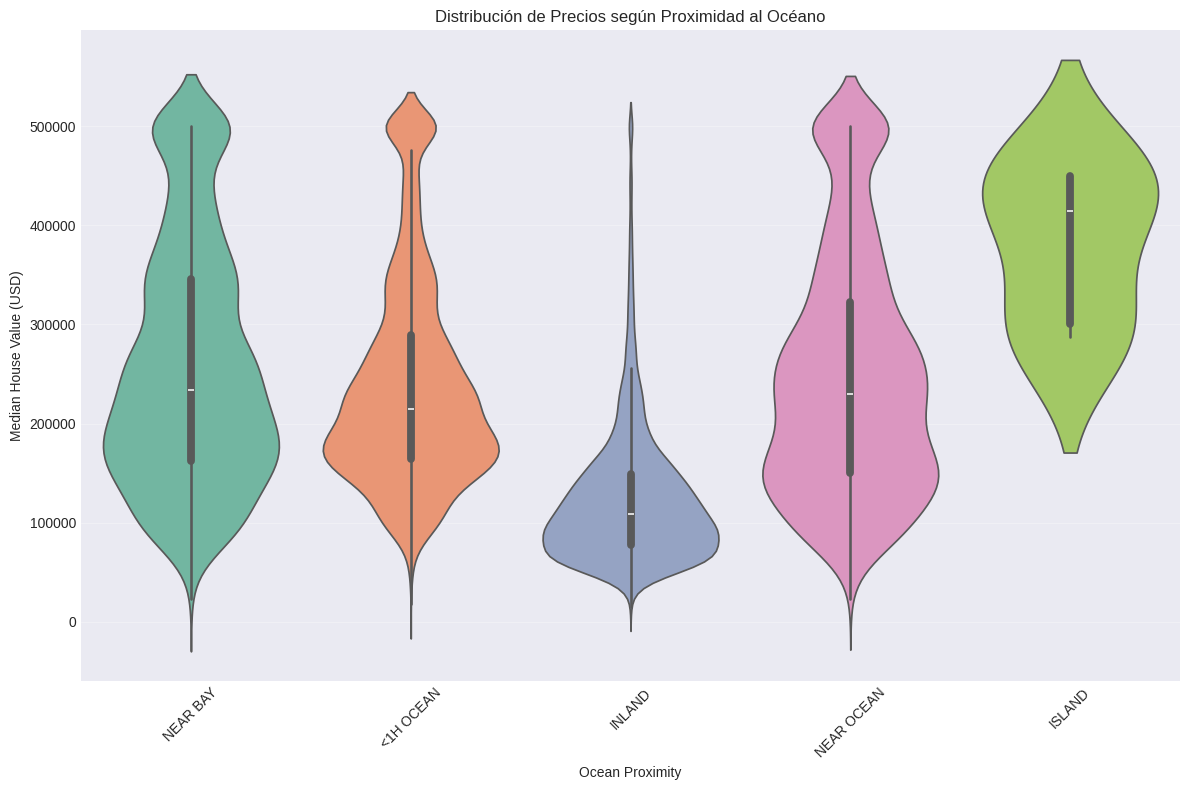

In [13]:
# Violin plot: Precio por proximidad al océano
plt.figure(figsize=(12, 8))
sns.violinplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')
plt.title('Distribución de Precios según Proximidad al Océano')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Análisis Multivariable


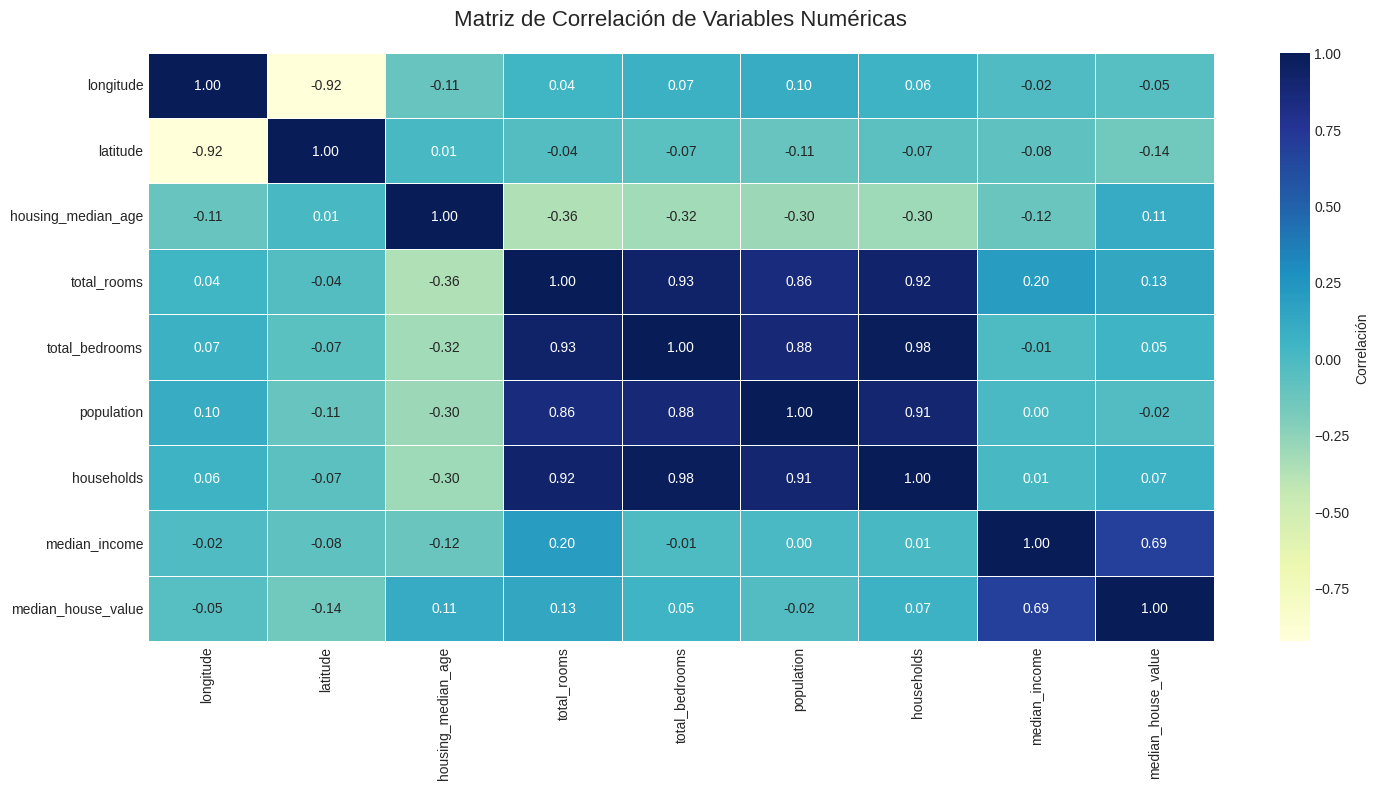

In [14]:
# Matriz de correlación
plt.figure(figsize=(15, 8))
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

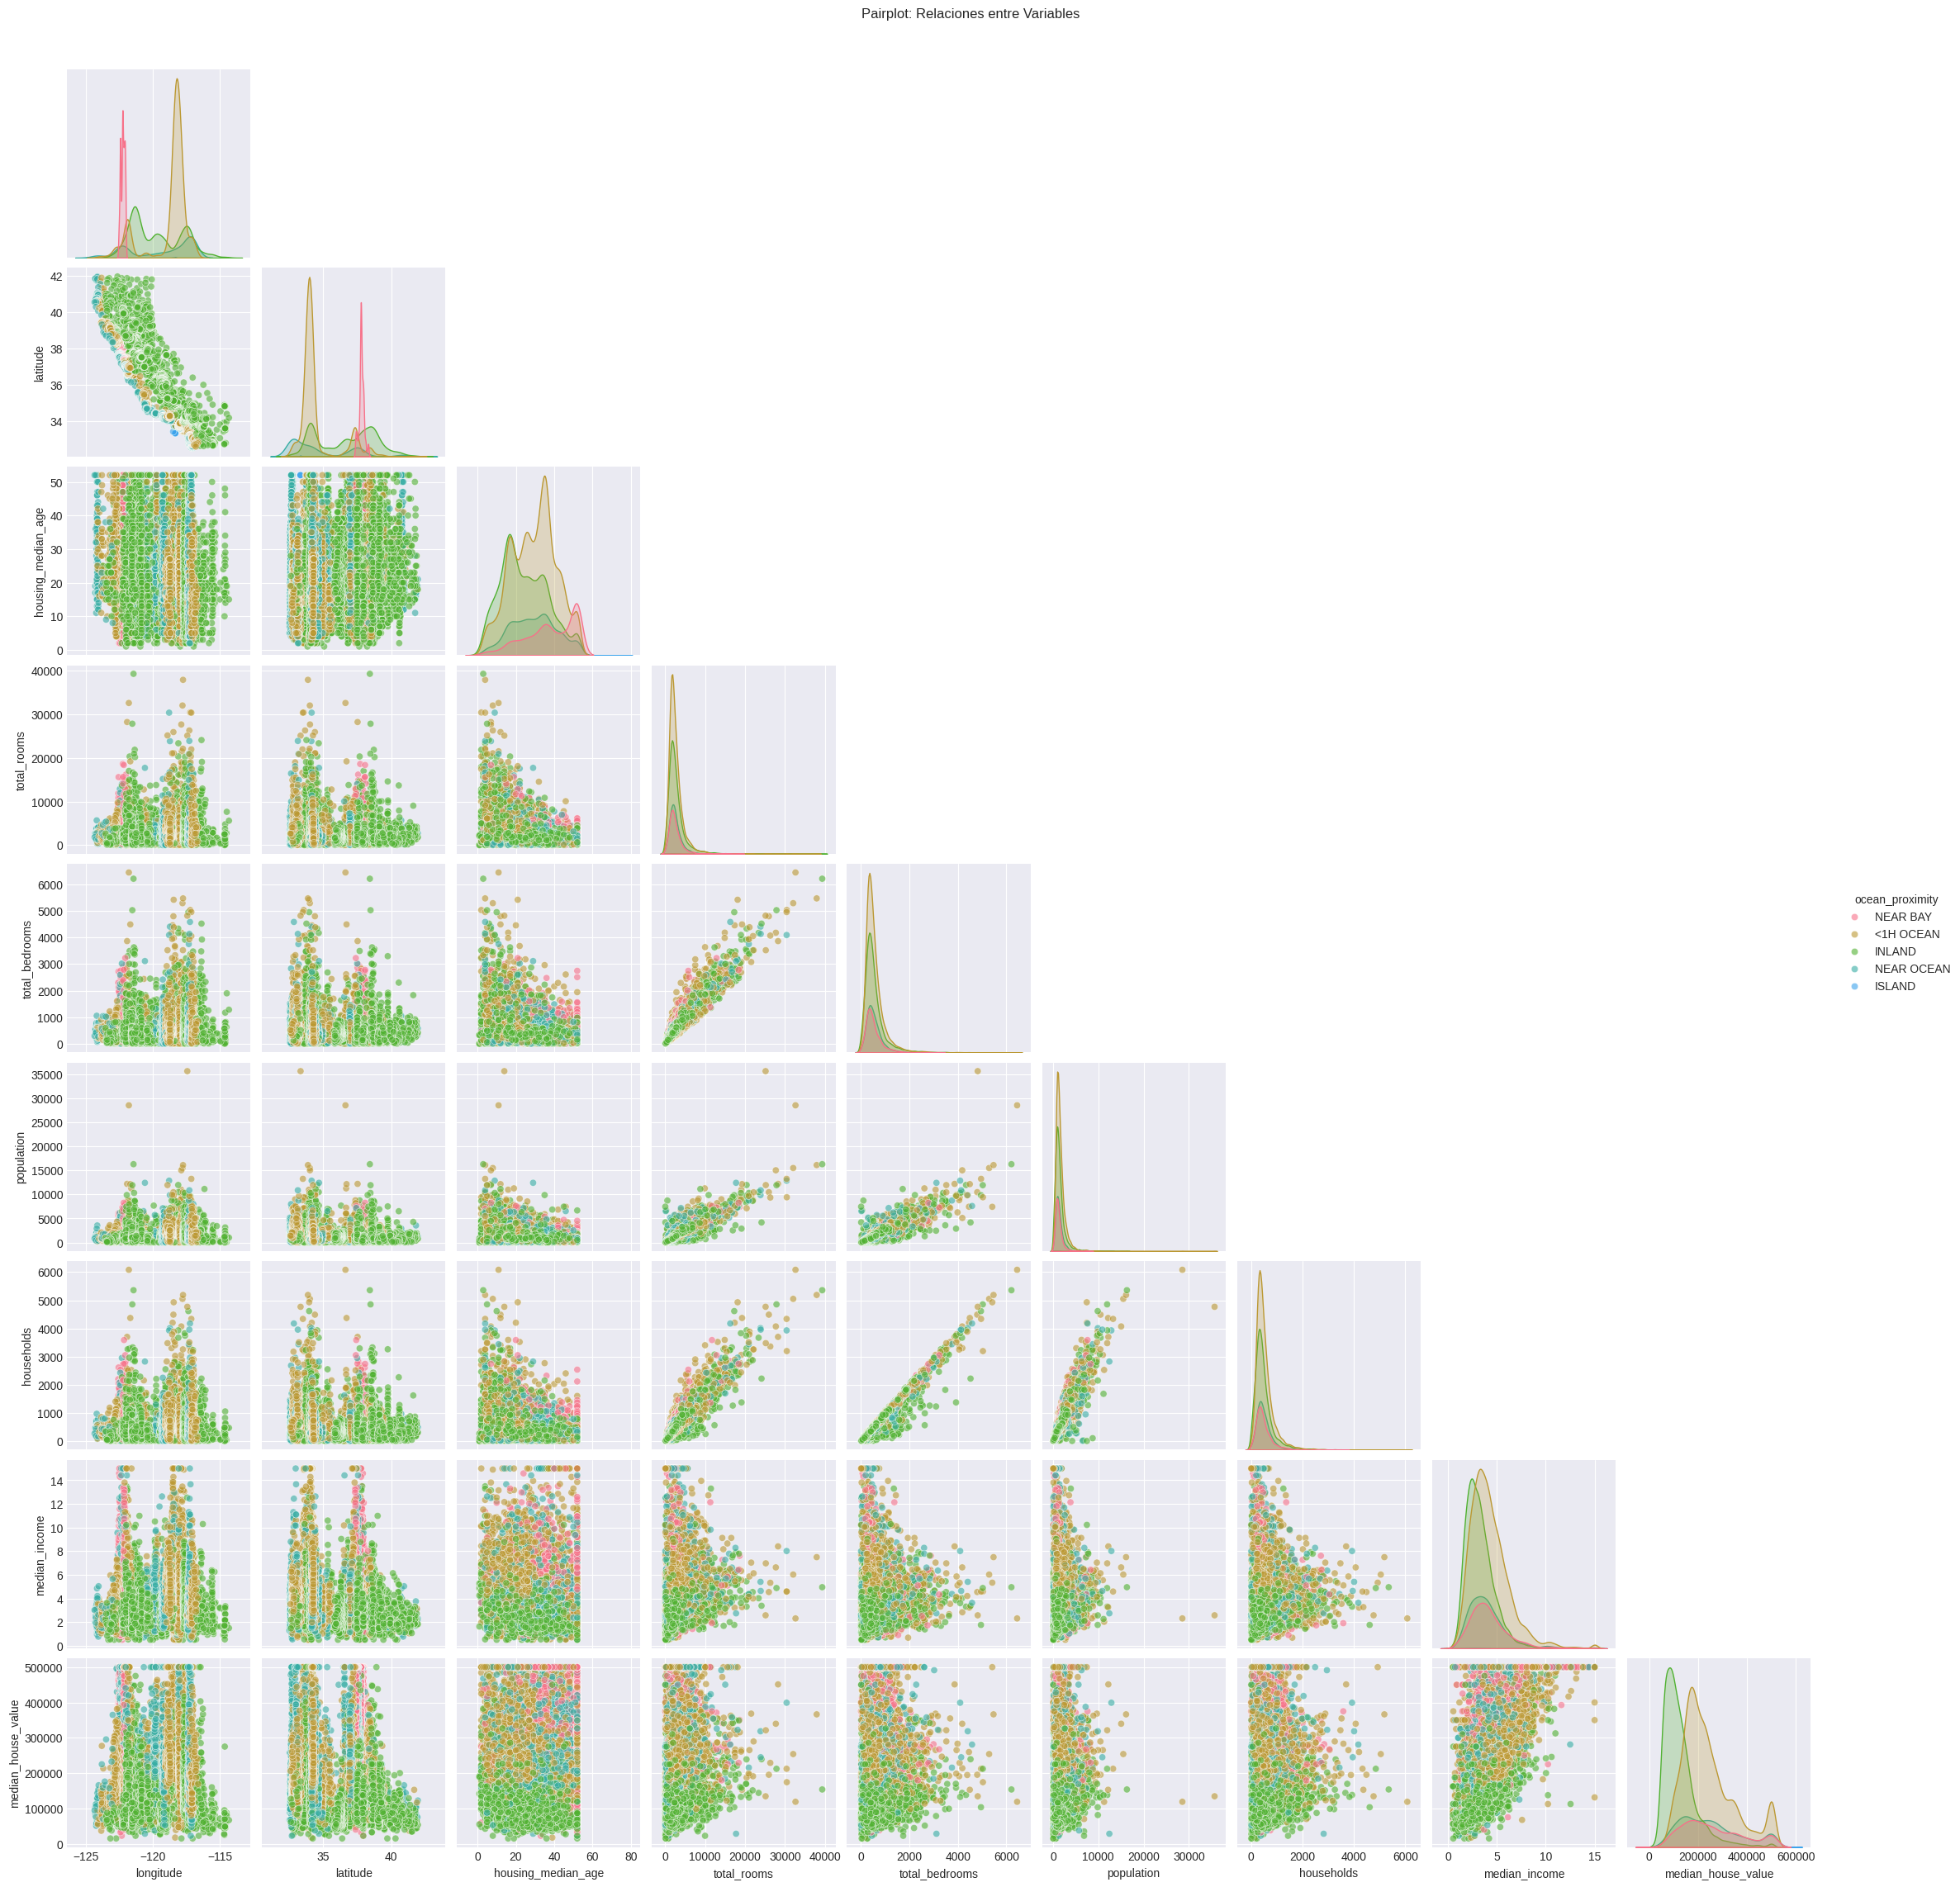

In [15]:
# Pairplot con la variable categórica
sns.pairplot(df.select_dtypes(include=np.number).join(df['ocean_proximity']), 
             hue='ocean_proximity', 
             diag_kind='kde',
             plot_kws={'alpha': 0.6},
             corner=True)
plt.suptitle('Pairplot: Relaciones entre Variables', y=1.02)
plt.show()

## 6. Conclusiones del EDA y pasos a seguir

**Hallazgos Principales:**

1. **Valores Nulos:**
   - `total_bedrooms` tiene 207 valores nulos (~1%)
   - **Acción**: Imputar con la mediana (más robusta ante outliers)

2. **Outliers:**
   - Presentes en casi todas las variables numéricas
   - Especialmente en `population`, `total_rooms`, `total_bedrooms`
   - **Acción**: Evaluar técnicas de transformación (log, winsorization) o límites IQR

3. **Correlaciones Importantes:**
   - `median_income` tiene la correlación más fuerte con `median_house_value`
   - Correlaciones altas entre variables relacionadas (ej: `total_rooms` ↔ `total_bedrooms`)
   - **Acción**: Considerar crear features derivados (ej: rooms_per_household)

4. **Variable Categórica:**
   - `ocean_proximity`: Categoría "ISLAND" con solo 5 registros
   - **Acción**: Considerar eliminar o combinar con otra categoría

5. **Distribución Geográfica:**
   - Los precios más altos están concentrados en la costa (especialmente área de San Francisco/LA)
   - **Acción**: Las coordenadas geográficas son features importantes

6. **Distribuciones:**
   - Varias variables tienen distribuciones sesgadas
   - **Acción**: Aplicar transformaciones logarítmicas para normalizar

### **Próximos Pasos para Feature Engineering:**

1. ✅ Imputar valores nulos en `total_bedrooms`
2. ✅ Crear features derivados:
   - `rooms_per_household` = total_rooms / households
   - `bedrooms_per_room` = total_bedrooms / total_rooms
   - `population_per_household` = population / households
3. ✅ Codificar `ocean_proximity` (One-Hot Encoding)
4. ✅ Considerar transformaciones logarítmicas
5. ✅ Tratar outliers según estrategia definida
6. ✅ Normalizar/Escalar variables numéricas